<a href="https://colab.research.google.com/github/jhuarancca/ASU_DataMining/blob/main/getStockPriceDataUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

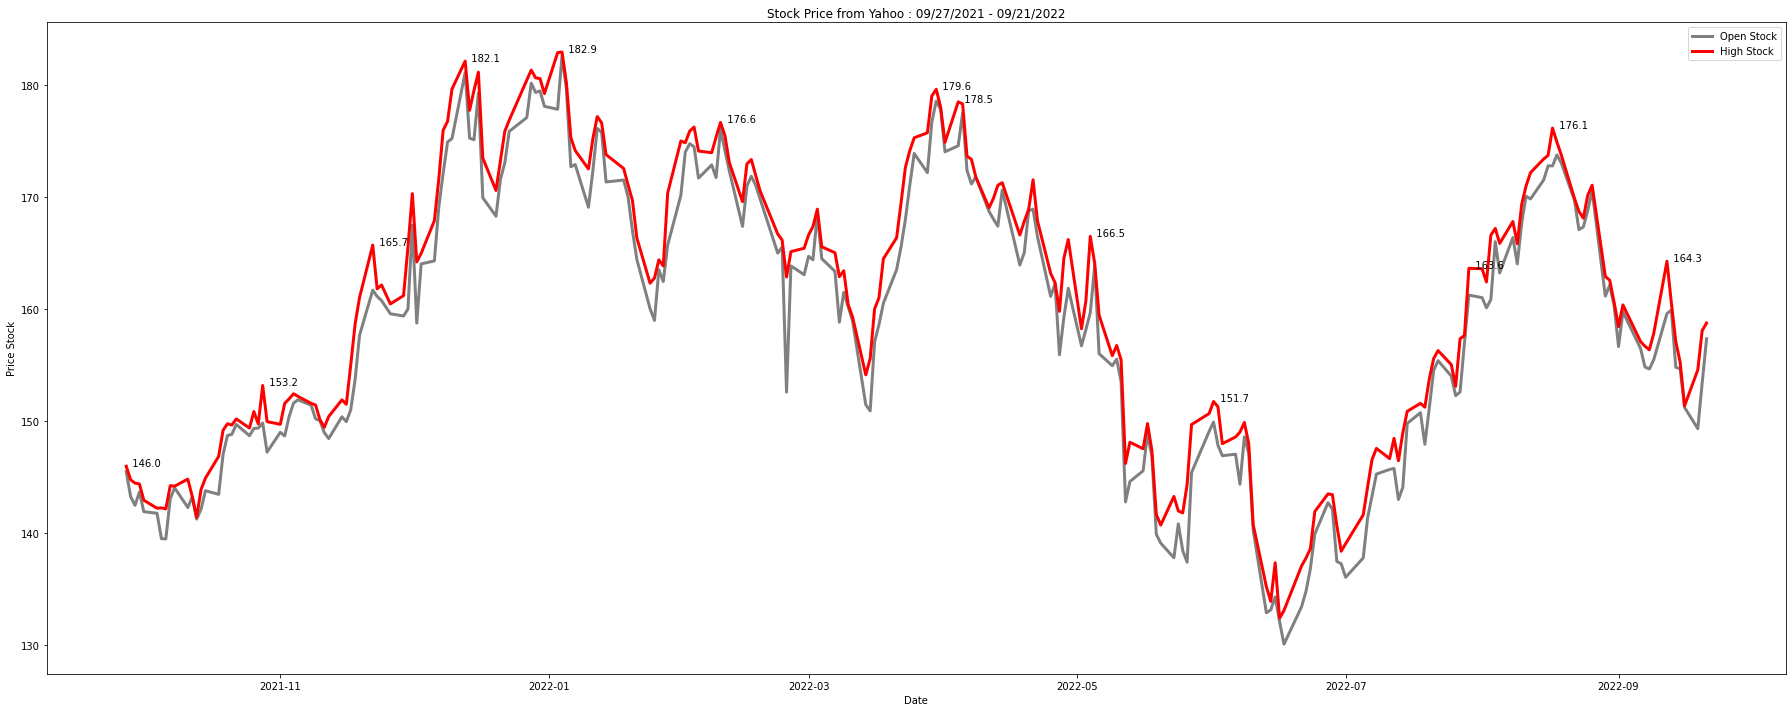

In [12]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=360)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',start=start_date,end=end_date,progress=False)

data["Date"] = data.index
data = data[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
#print(data.head())


import matplotlib.pyplot as plt
#plt.plot(data["Open"], marker='o')
# Labelling 
#plt.xlabel("Date")
#plt.ylabel("Date")
#plt.title("Open Stock Price")
# Display
#plt.show()

# Plot time series
plt.figure(figsize=(25,10))

plt.plot(data["Date"], data["Open"], color='Gray', label='Open Stock',linewidth=3)
#plt.plot(data["Date"], data["Low"], color='Gray',label='Low Stock', linewidth=3)
plt.plot(data["Date"], data["High"], color='Red',label='High Stock', linewidth=3)
#plt.plot(data["Date"], data["Close"], color='Gray',label='Close Stock', linewidth=3)

# Add title and labels

plt.title('Stock Price from Yahoo : '+data["Date"].min().strftime("%m/%d/%Y")+' - '+data["Date"].max().strftime("%m/%d/%Y"))
plt.xlabel('Date')
plt.ylabel('Price Stock')

# Add legend
plt.legend()
# Auto space
plt.tight_layout()

#for i in range(len(data["High"])):

import datetime
data["Month"]=data["Date"].dt.month
data["Year"]=data["Date"].dt.year
#data.dtypes
data["Print"]='N'

data['highMax'] = data.groupby(['Year','Month'])['High'].transform(max)
#df['count_max'] = df.groupby(['Mt'])['count'].transform(max)
#data2 = pd.DataFrame(data=data1.High, columns=['High'])

for index1, row1 in data.iterrows():
  if row1['High']==row1['highMax']:
    data.at[index1,'Print'] = 'Y'
  else:
    data.at[index1,'Print']='N'
# Display plot
for i in range(len(data["High"])):
    #if ((data.iloc[i]['High']>175) or (data.iloc[i]['High']<135)) and (data.iloc[i]['Print']=='Y'):
    if (data.iloc[i]['Print']=='Y'):
      plt.annotate(" %6.1f " % data.iloc[i]['High'] , xy=(data.iloc[i]['Date'], data.iloc[i]['High']))

plt.show() 
#data


In [9]:
column = data["Date"]
max_value = column.max()

data["Date"].max().strftime("%m/%d/%Y")

'09/21/2022'